In [2]:
using Plots
gr()

INFO: Precompiling module GR.


Plots.GRBackend()

In [3]:
function slicesampler(g; x0=0.1, N=1000, w=0.5, m=10)
    #= 1-D slice sampler, g: distribution function, x0 start point, N samples to return,
        w "out step" distance, m max number of outward steps
    =#
    xs = zeros(N)  # array that will be returned
    xs[1] = x0
    x1 = 0.0
    for i in 2:N
        y0 = g(x0)  #height of distribution at x0
        y = y0*rand() # height for slice
        #start stepping out
        U = rand()   # between 0 and 1
        L = x0 - w*U
        R = L + w
        V = rand()
        J = floor(m*V)
        K = (m - 1) - J
        while J > 0 && y < g(L)
            L = L - w
            J = J - 1
        end
        while K > 0 && y < g(R)
            R = R + w
            K = K - 1
        end
        #now should be stepped out beyond distribution at slice level
        # work back in if no value found:
        Lbar, Rbar = L, R
        while true 
            U = rand()
            x1 = Lbar + U * (Rbar - Lbar)
            if y < g(x1)
                break # exit while loop
            end
            if x1 < x0
                Lbar = x1
                else 
                Rbar = x1
            end
        end
        xs[i] = x1 # found an acceptable point, record in chain
        x0 = x1 # set initial to new point for next round.
    end  #for
    return xs 
end
    
    

slicesampler (generic function with 1 method)

In [4]:
function g(x)
    return exp(-0.5*x^2)
end

g (generic function with 1 method)

In [5]:
s = slicesampler(g, N=10000)

10000-element Array{Float64,1}:
  0.1     
  1.3247  
 -0.46819 
 -0.114011
  0.557374
 -0.426032
  0.114083
  0.340116
 -0.669782
  0.596125
  1.99165 
  1.76079 
  1.94712 
  ⋮       
 -0.790221
  0.343993
 -1.01867 
 -0.920114
 -0.441146
 -0.739283
  0.661879
  1.3056  
  1.16613 
 -1.39414 
 -1.27179 
  0.516778

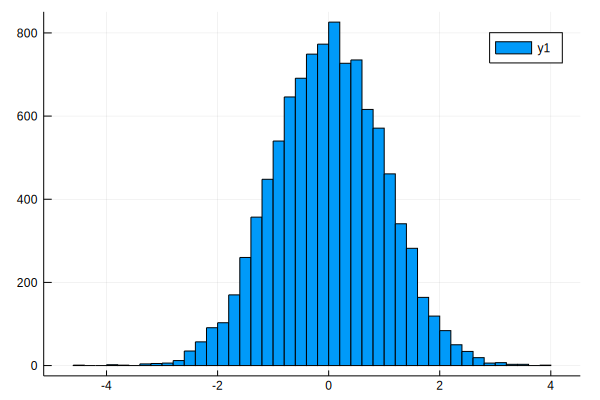

In [6]:
histogram(s)

In [7]:
function planck(x::Number)
    if x < 0
        return 0.0
    else
        return x^3/(exp(x) - 1)
    end
end

planck (generic function with 1 method)

In [8]:
p = slicesampler(planck, N=100000);

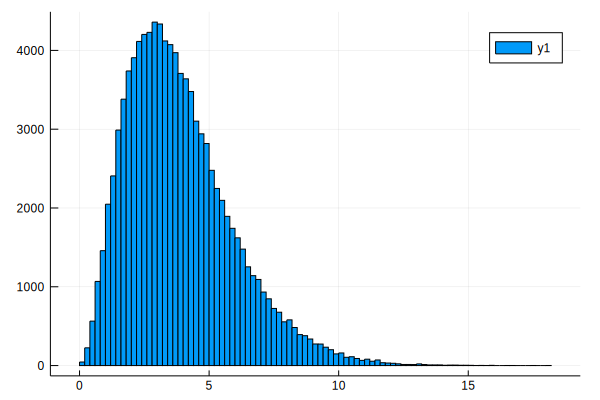

In [9]:
histogram(p)

In [9]:
typeof(planck)

#planck

In [10]:
function lgslicer(g; x0=0.1, N=1000, w=0.5, m=10)
    #= 1-D slice sampler, g: log of distribution function, x0 start point, N samples to return,
        w "out step" distance, m max number of outward steps.
    
        Note that you only have to worry about log scaling in 'vertical' comparisons
        in these Monte Carlo chain calculations.
    =#
    xs = zeros(N)  # array that will be returned
    xs[1] = x0
    x1 = 0.0
    for i in 2:N
        y0 = g(x0)  #height of distribution at x0
        y = y0+log(rand()) # height for slice
        #start stepping out
        U = rand()   # between 0 and 1
        L = x0 - w*U
        R = L + w
        V = rand()
        J = floor(m*V)
        K = (m - 1) - J
        while J > 0 && y < g(L)
            L = L - w
            J = J - 1
        end
        while K > 0 && y < g(R)
            R = R + w
            K = K - 1
        end
        #now should be stepped out beyond distribution at slice level
        # work back in if no value found:
        Lbar, Rbar = L, R
        while true 
            U = rand()
            x1 = Lbar + U * (Rbar - Lbar)
            if y < g(x1)
                break # exit while loop
            end
            if x1 < x0
                Lbar = x1
                else 
                Rbar = x1
            end
        end
        xs[i] = x1 # found an acceptable point, record in chain
        x0 = x1 # set initial to new point for next round.
    end  #for
    return xs 
end
    
    

lgslicer (generic function with 1 method)

In [11]:
function lgauss(x::Number)
    return -0.5*x^2
end

lgauss (generic function with 1 method)

In [13]:
L = lgslicer(lgauss, N=1000000);

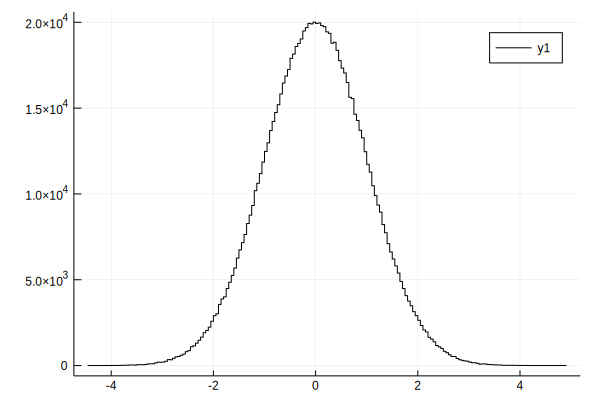

In [14]:
stephist(L,color="black")

In [15]:
function lpl(x::Number)
    #= log of Planck distribution =#
    if x > 0
        return 3*log(x) - log(exp(x) - 1)
    else
        return -Inf
    end
end

lpl (generic function with 1 method)

In [16]:
P = lgslicer(lpl, N=1000000);

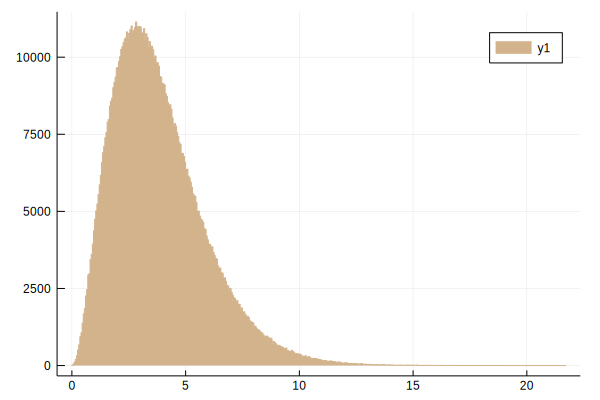

In [17]:
stephist(P, fill=true, color="tan")

In [1]:
function slicerm(g, dim, x0, xargs; N=1000, w=0.5, m=10)
    #= multi-D slice sampler, g: log of distribution function, 
    dim number of dimensions
    x0 start point, 
    xargs extra arguments for distribution, N*dim samples to return,
        w "out step" distance, m max number of outward steps.
    
        Note that you only have to worry about log scaling in 'vertical' comparisons
        in these Monte Carlo chain calculations.
    =#
    xs = zeros(N*dim,dim)  # array that will be returned
    xs[1,:] = x0  #x0 should be vector of length dim
    x1 = zeros(1,dim)
    L = zeros(1,dim)
    R = zeros(1,dim)
    way = zeros(1,dim)  # which axis to go along in space
    for i in 2:N*dim
        for d in 1:dim
            way = 0*way #clear it
            way[d] = 1.0 #set nonzero in direction we go for slicing
            y0 = g(x0,xargs)  #height of distribution at x0
            y = y0+log(rand()) # height for slice
            #start stepping out
            U = rand()   # between 0 and 1
            L = x0 - w*way*U
            R = L + w*way
            V = rand()
            J = floor(m*V)
            K = (m - 1) - J
            while J > 0 && y < g(L,xargs)
                L = L - w*way
                J = J - 1
            end
            while K > 0 && y < g(R,xargs)
                R = R + w*way
                K = K - 1
            end
            #now should be stepped out beyond distribution at slice level
            # work back in if no value found:
            Lbar, Rbar = L, R
            while true 
                U = rand()
                x1 = Lbar + U * (Rbar - Lbar)  # vector subtraction should be correct dir
                if y < g(x1,xargs)
                    break # exit while loop
                end
                if x1[d] < x0[d]
                    Lbar = x1
                    else 
                    Rbar = x1
                end
            end
            xs[i,:] = x1 # found an acceptable point, record in chain (a row)
            x0 = x1 # set initial to new point for next round.
        end # for d
    end  #for N
    return xs 
end
    
    

slicerm (generic function with 1 method)

In [2]:
function g2(x,xa)
    return -0.5*dot(x,x)
end

g2 (generic function with 1 method)

In [5]:
res = slicerm(g2, 2, [0.0 0.1], 0, N=500)

1000×2 Array{Float64,2}:
  0.0         0.1      
 -0.0397034   0.39406  
 -0.20288     0.947749 
 -0.895497   -0.418391 
 -0.519873   -0.825288 
 -0.0295202  -0.903138 
  0.564666    0.821993 
  0.456604   -0.53381  
 -0.418808   -0.563886 
 -0.427622   -0.0815788
  0.234772    0.245338 
 -0.630524   -0.0126757
 -0.640692   -0.422064 
  ⋮                    
  1.73151     0.54621  
  1.14227     1.22197  
  0.533811    0.533599 
  0.947598    0.241286 
  0.321238   -0.973033 
 -0.805035   -0.145381 
 -1.13628     0.979072 
 -0.575669    0.865318 
  0.409159   -0.268917 
  0.173968   -0.100601 
 -0.0339274   0.212358 
  0.664284   -0.0542288

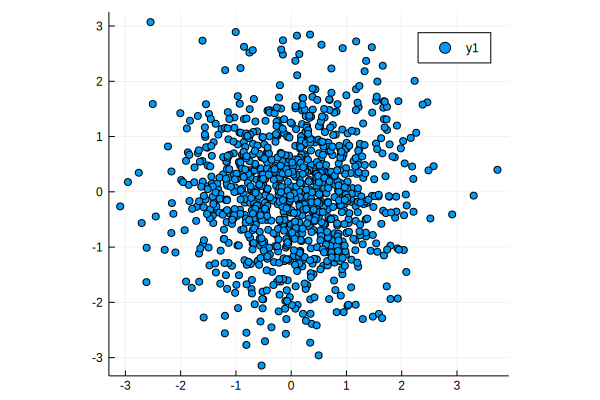

In [21]:
scatter(res[:,1], res[:,2],aspect_ratio=1.0)

In [22]:
function llg2(theta, icv) 
    #= Multidimensional gaussian
    arguments are theta - vector position (row), icv - inverse covariance matrix (square)
    =#
    r = -0.5*(theta * icv * theta.' )
    r[1] #this is required to convert the array to a number, 
        # since I want this to be a log pdf
end

llg2 (generic function with 1 method)

In [23]:
p = llg2([0.1 0.1], [2.0 -1.2; -1.2 2])

-0.008000000000000002

In [24]:
res = slicerm(llg2, 2, [0.0 0.1],[2.0 -1.2; -1.2 2], N=500000);

In [25]:
h2 = histogram2d(res[:,1], res[:,2])
savefig(h2, "bivarn.png") # isn't working well with gr on mac

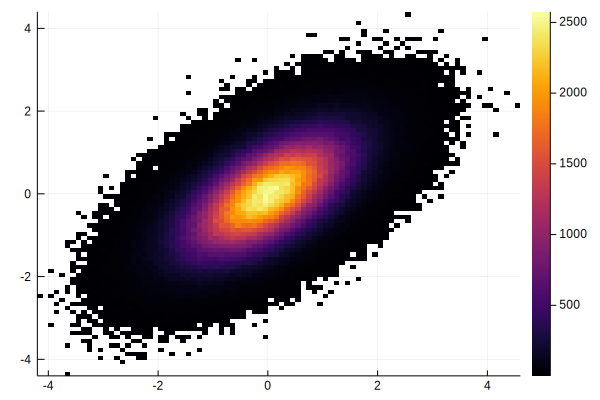

In [26]:
histogram2d(res[:,1], res[:,2])

In [130]:
?savefig

search: savefig StackOverflowError



```
savefig([plot,] filename)
```

Save a Plot (the current plot if `plot` is not passed) to file. The file type is inferred from the file extension. All backends support png and pdf file types, some also support svg, ps, eps, html and tex.


In [78]:
[1; 1; 1]

3-element Array{Int64,1}:
 1
 1
 1

In [79]:
[1 1 1]'

3×1 Array{Int64,2}:
 1
 1
 1

In [137]:
[1, 1, 1]

3-element Array{Int64,1}:
 1
 1
 1

In [138]:
[1 1 1]

1×3 Array{Int64,2}:
 1  1  1

In [140]:
a = [1 1 1]
b = [1 1 1]'
c = a*b

1×1 Array{Int64,2}:
 3

In [146]:
b*a

3×3 Array{Int64,2}:
 1  1  1
 1  1  1
 1  1  1

In [145]:
b

3×1 Array{Int64,2}:
 1
 1
 1